<a href="https://colab.research.google.com/github/gonzaluna/challenge1_DS_AL/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [87]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación




Tienda 1:

 	Ingreso Total: $1,150,880,400.00

Tienda 2:

 	Ingreso Total: $1,116,343,500.00

Tienda 3:

 	Ingreso Total: $1,098,019,600.00

Tienda 4:

 	Ingreso Total: $1,038,375,700.00


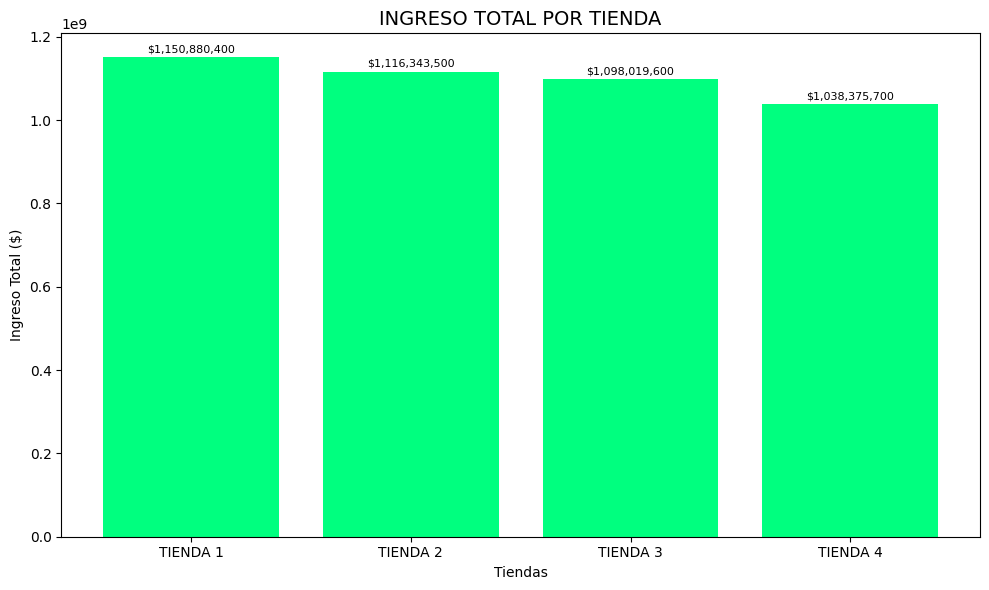

In [92]:
import matplotlib.pyplot as plt

# Lista de DataFrames
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = [f'TIENDA {i}' for i in range(1, 5)]

# Lista para almacenar ingresos totales
ingresos_totales = []

# Calcular e imprimir ingresos por tienda
for i, tiendas_df in enumerate(tiendas, start=1):
    Ingreso_Total = tiendas_df['Precio'].sum()
    ingresos_totales.append(Ingreso_Total)
    print(f"\nTienda {i}:\n\n \tIngreso Total: ${Ingreso_Total:,.2f}")

# Graficar ingresos totales
plt.figure(figsize=(10, 6))
plt.bar(nombres_tiendas, ingresos_totales, color='springgreen')
plt.title('INGRESO TOTAL POR TIENDA', fontsize=14)
plt.xlabel('Tiendas', fontsize=10)
plt.ylabel('Ingreso Total ($)', fontsize=10)

# Mostrar valores sobre cada barra
for i, ingreso in enumerate(ingresos_totales):
    plt.text(i, ingreso + (max(ingresos_totales) * 0.01), f"${ingreso:,.0f}",
             ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


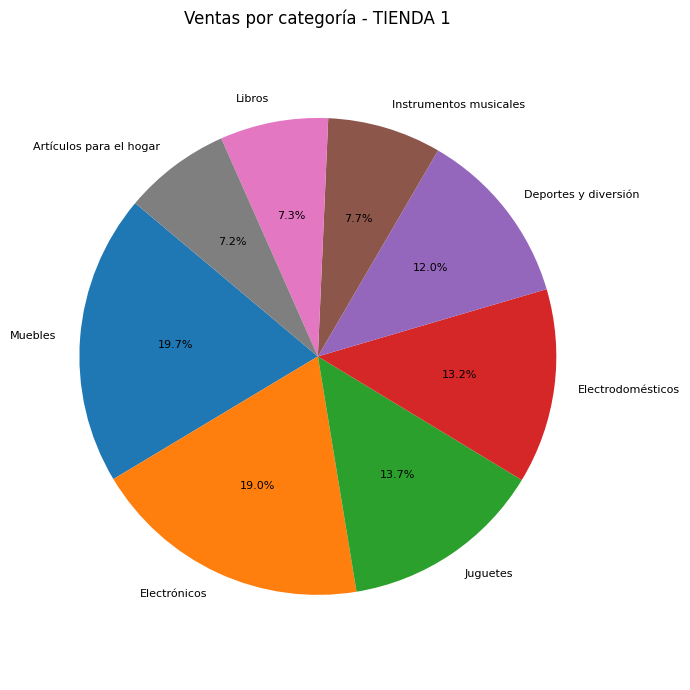


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


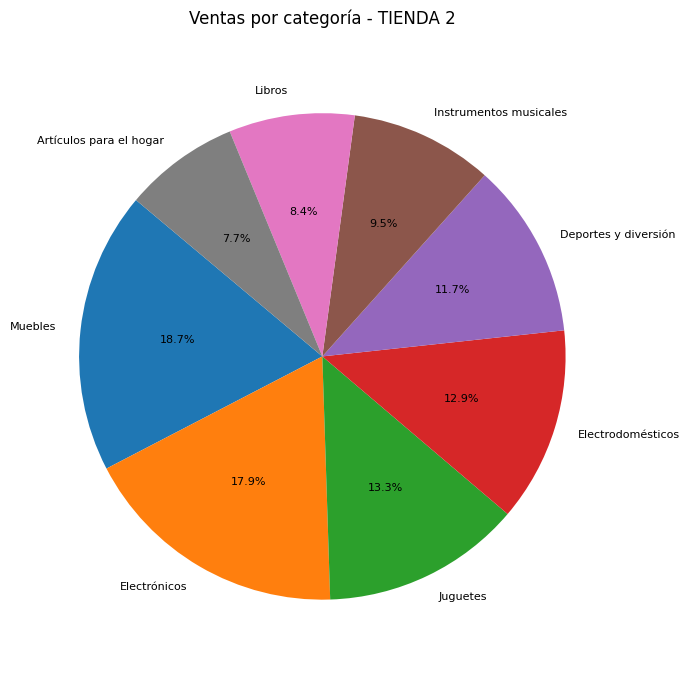


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


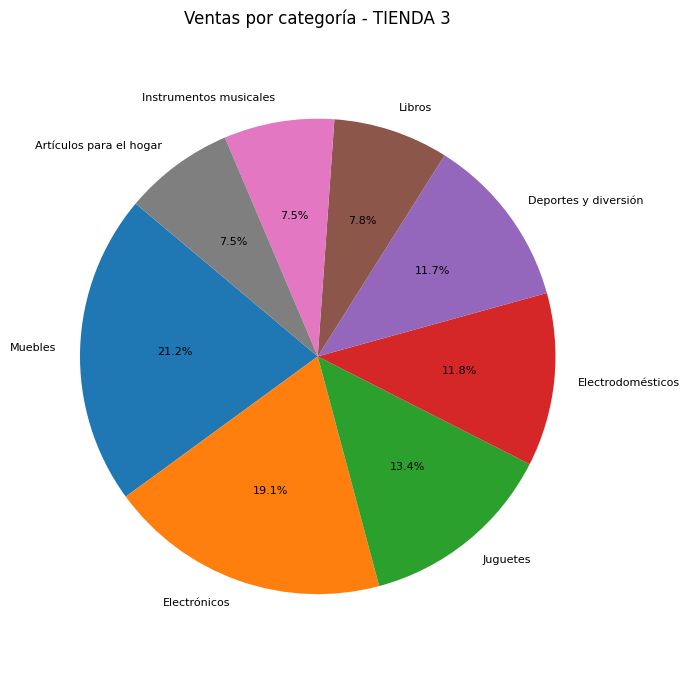


 VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - TIENDA 4
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


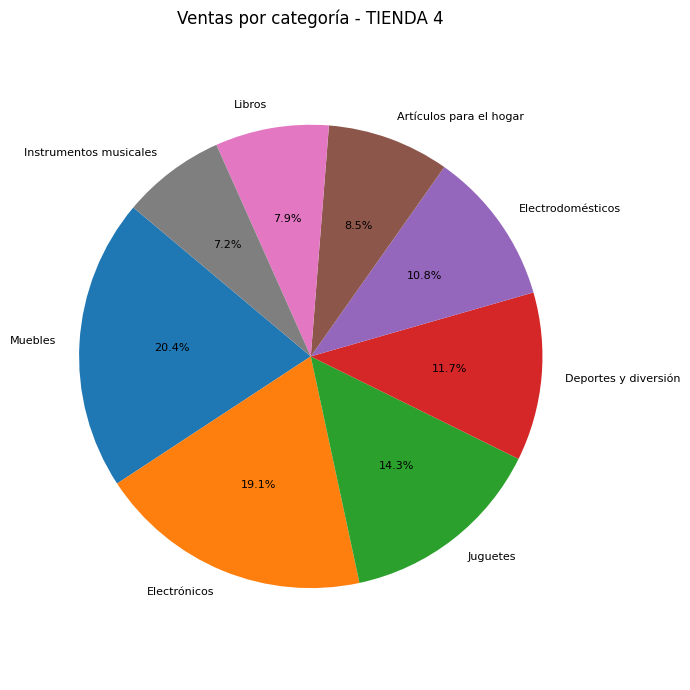

In [90]:
import matplotlib.pyplot as plt

# Agrupar en listas para procesarlas fácilmente
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Diccionario para guardar los resultados
ventas_por_categoria = {}

# Calcular cantidad de productos vendidos por categoría
for i, tienda in enumerate(tiendas):
    cantidad_vendida = tienda['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombres_tiendas[i]] = cantidad_vendida

# Mostrar resultados y graficar
for tienda_nombre, ventas in ventas_por_categoria.items():
    print("\n" + "="*60)
    print(f" VENTAS POR CATEGORÍA ORDENADAS DE MAYOR A MENOR - {tienda_nombre}")
    print("="*60)
    print(ventas)

    # Gráfica de pastel
    plt.figure(figsize=(7, 7))
    plt.pie(ventas.values,
            labels=ventas.index,
            autopct='%1.1f%%',
            startangle=140,
            textprops={'fontsize': 8})
    plt.title(f'Ventas por categoría - {tienda_nombre}', fontsize=12)
    plt.axis('equal')  # Asegura que el pastel sea circular
    plt.tight_layout()
    plt.show()




# 3. Calificación promedio de la tienda


CALIFICACION PROMEDIO EN CADA TIENDA

TIENDA 1: 

	3.98 

TIENDA 2: 

	4.04 

TIENDA 3: 

	4.05 

TIENDA 4: 

	4.0 



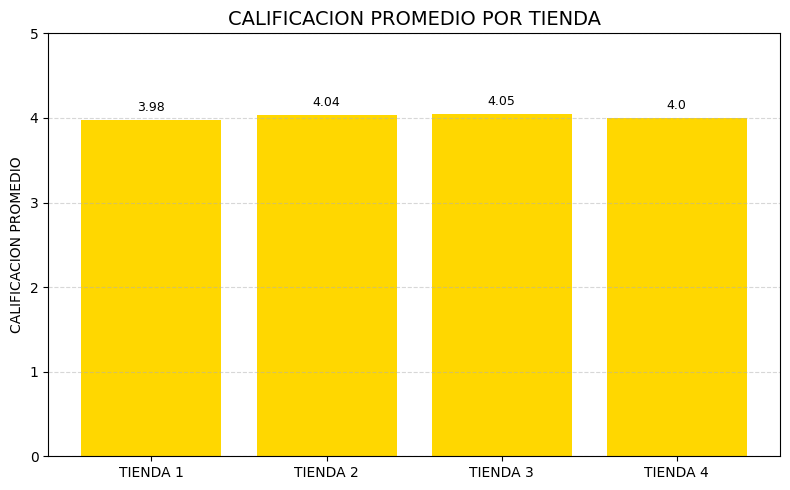

In [74]:
import matplotlib.pyplot as plt

# Agrupamos las tiendas en una lista
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Diccionario para almacenar las calificaciones promedio
calificaciones_promedio = {}

# Calcular promedio de calificación por tienda
for i, tienda in enumerate(tiendas):
    promedio = tienda['Calificación'].mean()
    calificaciones_promedio[nombres_tiendas[i]] = round(promedio, 2)

# Mostrar resultados
print("CALIFICACION PROMEDIO EN CADA TIENDA\n")
for tienda, calificacion in calificaciones_promedio.items():
    print(f"{tienda}: \n\n\t{calificacion} \n")


# Gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(calificaciones_promedio.keys(),
        calificaciones_promedio.values(),
        color='gold')

plt.title('CALIFICACION PROMEDIO POR TIENDA', fontsize=14)
plt.ylabel('CALIFICACION PROMEDIO', fontsize=10)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar etiquetas de valor sobre cada barra
for i, valor in enumerate(calificaciones_promedio.values()):
    plt.text(i, valor + 0.1, str(valor), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

--- TIENDA 1 ---
 Producto más vendido: 'Microondas' con 60 ventas.
 Producto menos vendido: 'Auriculares con micrófono' con 33 ventas.

--- TIENDA 2 ---
 Producto más vendido: 'Iniciando en programación' con 65 ventas.
 Producto menos vendido: 'Juego de mesa' con 32 ventas.

--- TIENDA 3 ---
 Producto más vendido: 'Kit de bancas' con 57 ventas.
 Producto menos vendido: 'Bloques de construcción' con 35 ventas.

--- TIENDA 4 ---
 Producto más vendido: 'Cama box' con 62 ventas.
 Producto menos vendido: 'Guitarra eléctrica' con 33 ventas.



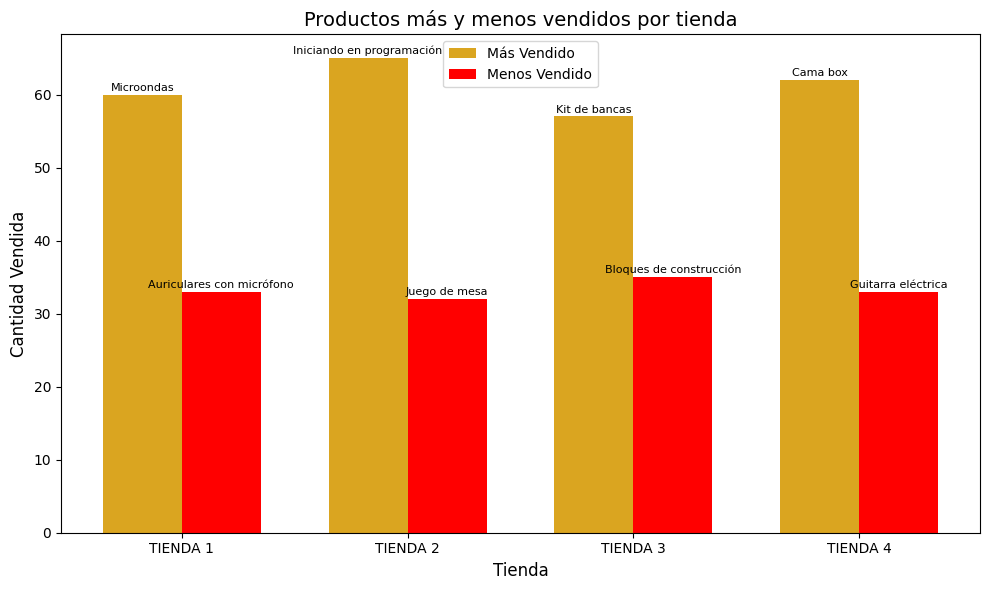

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Lista con los DataFrames y nombres de las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Listas para almacenar los resultados
mas_vendidos = []
menos_vendidos = []

# Identificar productos destacados
for i, tienda in enumerate(tiendas):
    ventas_producto = tienda['Producto'].value_counts()

    producto_mas_vendido = ventas_producto.idxmax()
    cantidad_mas_vendido = ventas_producto.max()

    producto_menos_vendido = ventas_producto.idxmin()
    cantidad_menos_vendido = ventas_producto.min()

    mas_vendidos.append((producto_mas_vendido, cantidad_mas_vendido))
    menos_vendidos.append((producto_menos_vendido, cantidad_menos_vendido))

    # Mostrar resultados
    print(f"--- {nombres_tiendas[i]} ---")
    print(f" Producto más vendido: '{producto_mas_vendido}' con {cantidad_mas_vendido} ventas.")
    print(f" Producto menos vendido: '{producto_menos_vendido}' con {cantidad_menos_vendido} ventas.\n")

# Preparar datos para gráfica
x = np.arange(len(nombres_tiendas))  # posiciones para cada tienda
ancho = 0.35  # ancho de cada barra

cantidades_mas = [x[1] for x in mas_vendidos]
cantidades_menos = [x[1] for x in menos_vendidos]

productos_mas = [x[0] for x in mas_vendidos]
productos_menos = [x[0] for x in menos_vendidos]

# Crear la gráfica
plt.figure(figsize=(10, 6))
barras1 = plt.bar(x - ancho/2, cantidades_mas, width=ancho, label='Más Vendido', color='goldenrod')
barras2 = plt.bar(x + ancho/2, cantidades_menos, width=ancho, label='Menos Vendido', color='red')

# Etiquetas y título
plt.title('Productos más y menos vendidos por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(x, nombres_tiendas)
plt.legend()

# Mostrar etiquetas de productos arriba de cada barra
for i in range(len(x)):
    plt.text(x[i] - ancho/2, cantidades_mas[i] + 0.5, productos_mas[i], ha='center', fontsize=8, rotation=360)
    plt.text(x[i] + ancho/2, cantidades_menos[i] + 0.5, productos_menos[i], ha='center', fontsize=8, rotation=360)

plt.tight_layout()
plt.show()




# 5. Envío promedio por tienda

	Costo de envío promedio en TIENDA 1:

					$26018.61

	Costo de envío promedio en TIENDA 2:

					$25216.24

	Costo de envío promedio en TIENDA 3:

					$24805.68

	Costo de envío promedio en TIENDA 4:

					$23459.46



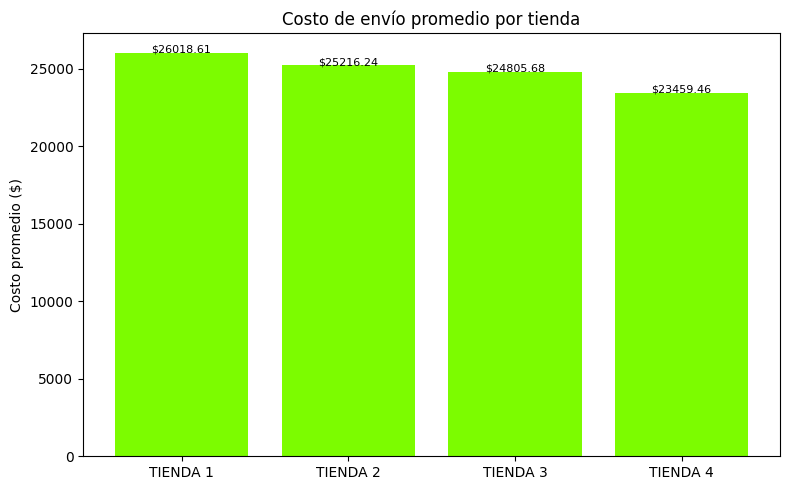

In [84]:
import matplotlib.pyplot as plt

# Lista con los DataFrames y nombres de las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Calcular costo de envío promedio por tienda
for i, tienda in enumerate(tiendas):
    if 'Costo de envío' in tienda.columns:
        promedio_envio = tienda['Costo de envío'].mean()
        print(f"\tCosto de envío promedio en {nombres_tiendas[i]}:\n\n\t\t\t\t\t${promedio_envio:.2f}\n")
    else:
        print(f"{nombres_tiendas[i]} no tiene columna 'CostoEnvio'")

# Almacenar promedios
promedios_envio = []

for tienda in tiendas:
    if 'Costo de envío' in tienda.columns:
        promedio = tienda['Costo de envío'].mean()
    else:
        promedio = 0
    promedios_envio.append(promedio)

# Gráfica
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios_envio, color='lawngreen')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo promedio ($)')
for i in range(len(promedios_envio)):
    plt.text(i, promedios_envio[i] + 0.5, f"${promedios_envio[i]:.2f}", ha='center', fontsize=8)
plt.tight_layout()
plt.show()



# 📊 INFORME FINAL DE EFICIENCIA POR TIENDA

##  Introducción

En una operación comercial distribuida entre varias tiendas, es fundamental realizar un análisis de datos para evaluar el rendimiento general de cada unidad de negocio.

Este estudio revisa indicadores clave como:

- Facturación total  
- Ventas por categoría de producto  
- Calificación promedio por tienda  
- Productos más y menos vendidos  
- Costo promedio de envío  

Estos datos nos permiten identificar fortalezas y debilidades en cada tienda para tomar decisiones estratégicas.

---

##  Análisis de Ingresos Totales

| Tienda   | Ingreso Total             |
|----------|---------------------------|

| Tienda 1 | $1,150,880,400.00         |
|----------|---------------------------|

| Tienda 2 | $1,116,343,500.00         |
|----------|---------------------------|

| Tienda 3 | $1,098,019,600.00         |
|----------|---------------------------|

| Tienda 4 | $1,038,375,700.00         |
|----------|---------------------------|

➡️ **La Tienda 1 lidera en facturación, mientras que la Tienda 4 presenta el menor ingreso.**

---

##  Análisis por Categoría de Producto

Las cuatro tiendas tienen la **categoría de muebles** como la más vendida.  
En segundo y tercer lugar, de forma constante aparecen **electrónicos** y **juguetes**.

✅ Esto indica que **muebles, electrónicos y juguetes** son productos estratégicos que deben priorizarse en inventario y promoción.

---

##  Calificación Promedio por Tienda

| Tienda   | Calificación Promedio |
|----------|------------------------|
| Tienda 1 | 3.98 ❌ (la más baja)   |
| Tienda 2 | 4.04                   |
| Tienda 3 | 4.05 ✅ (la más alta)   |
| Tienda 4 | 4.00                   |

➡️ **Tienda 3 tiene la mejor percepción por parte de los clientes**, mientras que la **Tienda 1 es la peor evaluada.**

---

##  Productos Más y Menos Vendidos

| Tienda   | Producto Más Vendido           | Ventas | Producto Menos Vendido      | Ventas |
|----------|--------------------------------|--------|------------------------------|--------|
| Tienda 1 | Microondas                     | 60     | Auriculares con micrófono   | 33     |
| Tienda 2 | Iniciando en programación      | 65     | Juego de mesa               | 32     |
| Tienda 3 | Kit de bancas                  | 57     | Bloques de construcción     | 35     |
| Tienda 4 | Cama box                       | 62     | Guitarra eléctrica          | 33     |

---

## 🚚 Costo Promedio de Envío

| Tienda   | Costo Promedio de Envío |
|----------|--------------------------|

| Tienda 1 | $26,018.61 ❌ (más alto) |
|----------|--------------------------|

| Tienda 2 | $25,216.24               |
|----------|--------------------------|

| Tienda 3 | $24,805.68               |
|----------|--------------------------|

| Tienda 4 | $23,459.46 ✅ (más bajo)|
|----------|--------------------------|

---

## 📈 Fortalezas y Debilidades por Tienda

### 🏪 Tienda 1

- ✅ Mayor ingreso total: $1,150,880,400.00  

- ❌ Peor calificación promedio: 3.98  

- ❌ Mayor costo de envío: $26,018.61  

### 🏪 Tienda 2

- 🔸 Buen ingreso: $1,116,343,500.00  

- 🔸 Calificación sólida: 4.04  

- 🔸 Costo de envío razonable: $25,216.24  

### 🏪 Tienda 3

- 🔸 Ingreso aceptable: $1,098,019,600.00  

- ✅ Mejor calificación promedio: 4.05  

- 🔸 Costo de envío competitivo: $24,805.68  

### 🏪 Tienda 4

- ❌ Menor ingreso total: $1,038,375,700.00  

- 🔸 Calificación promedio regular: 4.00  

- ✅ Menor costo de envío: $23,459.46  

---

##  Conclusión

La **Tienda 1** destaca por su volumen de ingresos, pero también muestra **las peores métricas en percepción del cliente y logística**, lo que podría afectar su rentabilidad. A pesar de esto, su alto nivel de ventas la mantiene como una unidad competitiva.

La **Tienda 4**, por su parte, presenta **el menor ingreso de todas las tiendas**. Aunque posee el costo de envío más bajo, **no destaca en ningún otro indicador clave**. Su rendimiento general sugiere **baja demanda o falta de posicionamiento efectivo** en el mercado.

---

## ✅ Recomendación Final

🔒 **Cerrar la Tienda 4**.

📦 Redirigir los recursos operativos, logísticos y publicitarios hacia las tiendas restantes, las cuales **han demostrado mejor desempeño general** en términos de ingresos, satisfacción del cliente y eficiencia logística.
